# Optimization Using Gradient Descent in One Variable
To understand how to optimize functions using gradient descent, start from simple examples - functions of one variable. In this lab, you will implement the gradient descent method for functions with single and multiple minima, experiment with the parameters and visualize the results. This will allow you to understand the advantages and disadvantages of the gradient descent method.

## Packages

In [5]:
!wget clone https://raw.githubusercontent.com/Ryota-Kawamura/Mathematics-for-Machine-Learning-and-Data-Science-Specialization/refs/heads/main/Course-2/Week-2/w2_tools.py

--2024-12-07 22:08:28--  http://clone/
Resolving clone (clone)... failed: Name or service not known.
wget: unable to resolve host address ‘clone’
--2024-12-07 22:08:28--  https://raw.githubusercontent.com/Ryota-Kawamura/Mathematics-for-Machine-Learning-and-Data-Science-Specialization/refs/heads/main/Course-2/Week-2/w2_tools.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14839 (14K) [text/plain]
Saving to: ‘w2_tools.py’

w2_tools.py         100%[===================>]  14.49K  --.-KB/s    in 0.001s  

2024-12-07 22:08:28 (10.2 MB/s) - ‘w2_tools.py’ saved [14839/14839]

FINISHED --2024-12-07 22:08:28--
Total wall clock time: 0.3s
Downloaded: 1 files, 14K in 0.001s (10.2 MB/s)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Some functions defined specifically for this notebook.
from w2_tools import plot_f, gradient_descent_one_variable, f_example_2, dfdx_example_2
# Magic command to make matplotlib plots interactive.
# %matplotlib widget

## Function with One Global Minimum

In [8]:
def f_example_1(x):
    return np.exp(x) - np.log(x)

def dfdx_example_1(x):
    return np.exp(x) - 1/x

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$x$', ylabel='$f$'>)

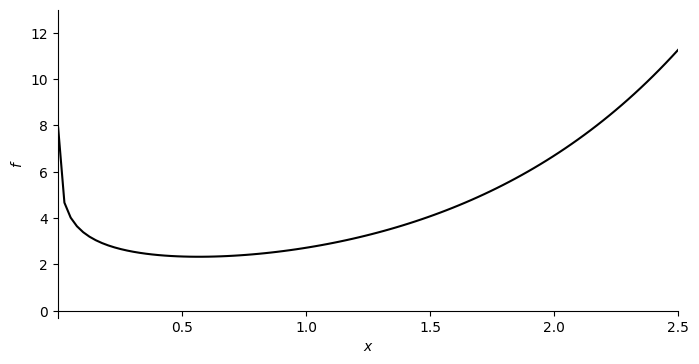

In [9]:
plot_f([0.001, 2.5], [-0.3, 13], f_example_1, 0.0)

In [11]:
def gradient_descent(dfdx, x, learning_rate = 0.1, num_iterations = 100):
    for iteration in range(num_iterations):
        x = x - learning_rate * dfdx(x)
    return x

In [12]:
num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
print("Gradient descent result: x_min =", gradient_descent(dfdx_example_1, x_initial, learning_rate, num_iterations))

Gradient descent result: x_min = 0.5671434156768685


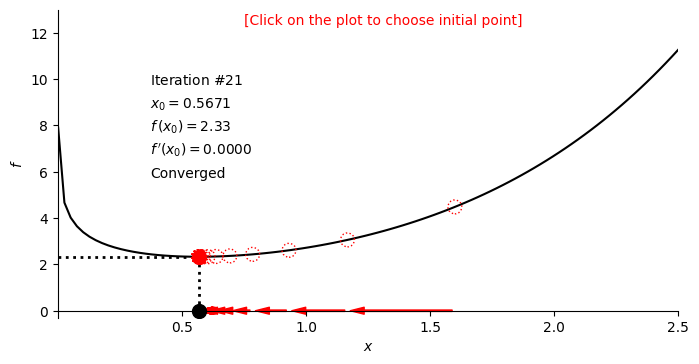

In [13]:
gd_example_1 = gradient_descent_one_variable([0.001, 2.5], [-0.3, 13], f_example_1, dfdx_example_1,
                                   gradient_descent, num_iterations, learning_rate, x_initial, 0.0, [0.35, 9.5])


Comments related to the choice of the parameters in the animation above:

* Choosing `num_iterations = 25`, `learning_rate = 0.1`, `x_initial = 1.6` you get to the minimum point successfully. Even a little bit earlier - on the iteration 21, so for this choice of the learning rate and initial point, the number of iterations could have been taken less than `25` to save some computation time.

* Increasing the `learning_rate` to `0.3` you can see that the method converges even faster - you need less number of iterations. But note that the steps are larger and this may cause some problems.

* Increasing the `learning_rate` further to `0.5` the method doesn't converge anymore! You steped too far away from the minimum point. So, be careful - increasing `learning_rate` the method may converge significantly faster... or not converge at all.

* To be "safe", you may think, why not to decrease `learning_rate`?! Take it `0.04`, keeping the rest of the parameters the same. The model will not run enough number of iterations to converge!

* Increasing `num_iterations`, say to `75`, the model will converge but slowly. This would be more "expensive" computationally.

* What if you get back to the original parameters `num_iterations = 25`, `learning_rate = 0.1`, but choose some other `x_initial`, e.g. `0.05`? The function is steeper at that point, thus the gradient is larger in absolute value, and the first step is larger. But it will work - you will get to the minimum point.

* If you take `x_initial = 0.03` the function is even steeper, making the first step significantly larger. You are risking "missing" the minimum point.

* Taking `x_initial = 0.02` the method doesn't converge anymore...

This is a very simple example, but hopefully, it gives you an idea of how important is the choice of the initial parameters.

## Function with Multiple Minima

Now you can take a slightly more complicated example - a function in one variable, but with multiple minima. Such an example was shown in the videos, and you can plot the function with the following code:




(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$x$', ylabel='$f$'>)

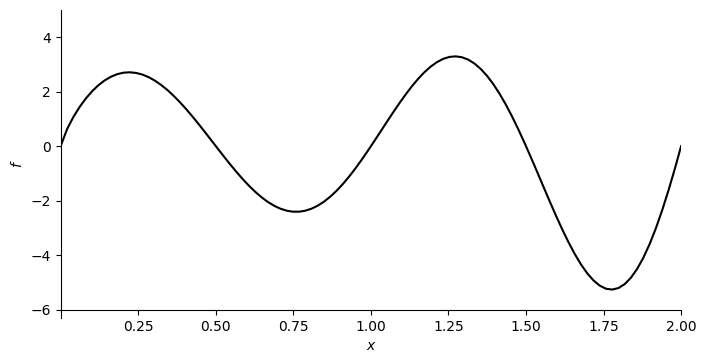

In [14]:
plot_f([0.001, 2], [-6.3, 5], f_example_2, -6)

Function `f_example_2` and its derivative `dfdx_example_2` are pre-defined and uploaded into this notebook. At this stage, while you are mastering the optimization method, do not worry about the corresponding expressions, just concentrate on the gradient descent and the related parameters for now.

Use the following code to run gradient descent with the same `learning_rate` and `num_iterations`, but with a different starting point:

In [15]:
print("Gradient descent results")
print("Global minimum: x_min =", gradient_descent(dfdx_example_2, x=1.3, learning_rate=0.005, num_iterations=35))
print("Local minimum: x_min =", gradient_descent(dfdx_example_2, x=0.25, learning_rate=0.005, num_iterations=35))

Gradient descent results
Global minimum: x_min = 1.7751686214270586
Local minimum: x_min = 0.7585728671820583


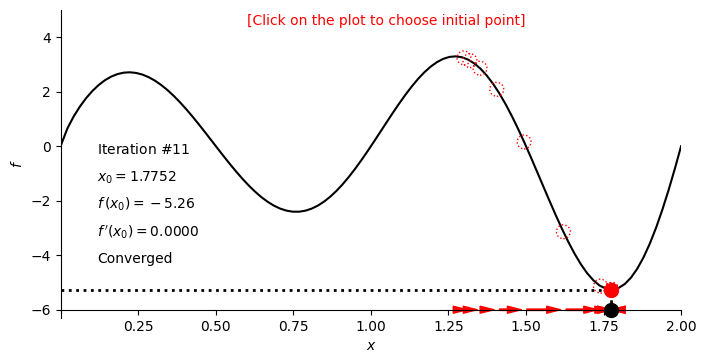

In [16]:
num_iterations = 35; learning_rate = 0.005; x_initial = 1.3
# num_iterations = 35; learning_rate = 0.005; x_initial = 0.25
# num_iterations = 35; learning_rate = 0.01; x_initial = 1.3

gd_example_2 = gradient_descent_one_variable([0.001, 2], [-6.3, 5], f_example_2, dfdx_example_2,
                                      gradient_descent, num_iterations, learning_rate, x_initial, -6, [0.1, -0.5])

# Optimization Using Gradient Descent in Two Variables
In this lab, you will implement and visualize the gradient descent method optimizing some functions in two variables. You will have a chance to experiment with the initial parameters, and investigate the results and limitations of the method.

## Packages

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# Some functions defined specifically for this notebook.
from w2_tools import (plot_f_cont_and_surf, gradient_descent_two_variables,
                      f_example_3, dfdx_example_3, dfdy_example_3,
                      f_example_4, dfdx_example_4, dfdy_example_4)
# Magic command to make matplotlib plots interactive.

## Function with One Global Minimum

(<Figure size 1000x500 with 2 Axes>,
 <Axes: xlabel='$x$', ylabel='$y$'>,
 <Axes3D: xlabel='$x$', ylabel='$y$', zlabel='$f$'>)

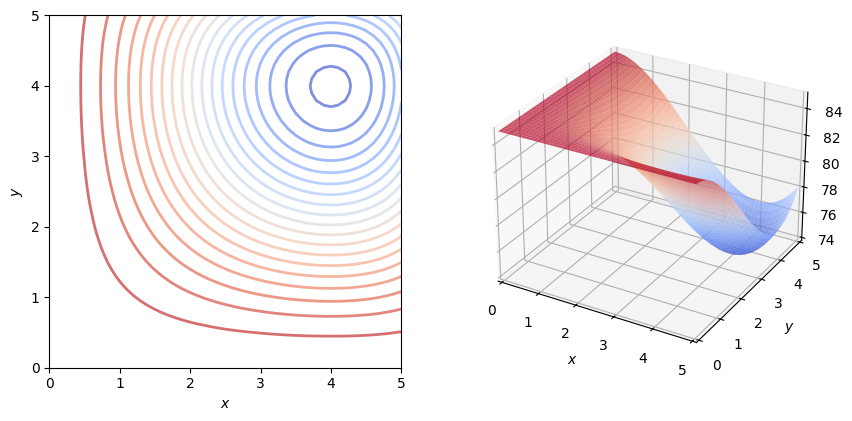

In [18]:
plot_f_cont_and_surf([0, 5], [0, 5], [74, 85], f_example_3, cmap='coolwarm', view={'azim':-60,'elev':28})

In [22]:
def gradient_descent(dfdx, dfdy, x, y, learning_rate = 0.1, num_iterations = 100):
    for iteration in range(num_iterations):
        x, y = x - learning_rate * dfdx(x, y), y - learning_rate * dfdy(x, y)
    return x, y

In [23]:
num_iterations = 30; learning_rate = 0.25; x_initial = 0.5; y_initial = 0.6
print("Gradient descent result: x_min, y_min =",
      gradient_descent(dfdx_example_3, dfdy_example_3, x_initial, y_initial, learning_rate, num_iterations))

Gradient descent result: x_min, y_min = (4.0, 4.0)


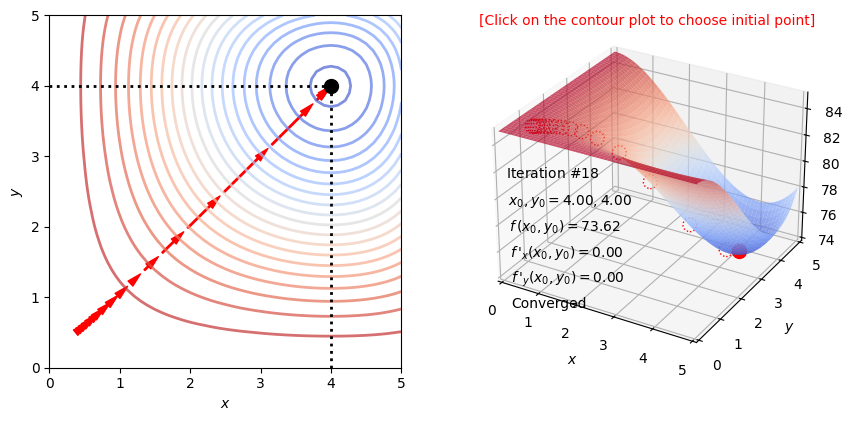

In [24]:
num_iterations = 20; learning_rate = 0.25; x_initial = 0.5; y_initial = 0.6
# num_iterations = 20; learning_rate = 0.5; x_initial = 0.5; y_initial = 0.6
# num_iterations = 20; learning_rate = 0.15; x_initial = 0.5; y_initial = 0.6
# num_iterations = 20; learning_rate = 0.15; x_initial = 3.5; y_initial = 3.6

gd_example_3 = gradient_descent_two_variables([0, 5], [0, 5], [74, 85],
                                              f_example_3, dfdx_example_3, dfdy_example_3,
                                              gradient_descent, num_iterations, learning_rate,
                                              x_initial, y_initial,
                                              [0.1, 0.1, 81.5], 2, [4, 1, 171],
                                              cmap='coolwarm', view={'azim':-60,'elev':28})

## Function with Multiple Minima

(<Figure size 1000x500 with 2 Axes>,
 <Axes: xlabel='$x$', ylabel='$y$'>,
 <Axes3D: xlabel='$x$', ylabel='$y$', zlabel='$f$'>)

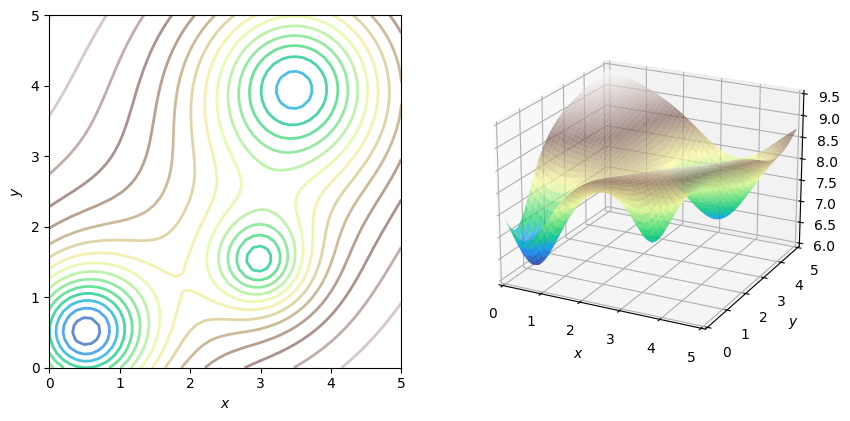

In [25]:
plot_f_cont_and_surf([0, 5], [0, 5], [6, 9.5], f_example_4, cmap='terrain', view={'azim':-63,'elev':21})

In [26]:
num_iterations = 100; learning_rate = 0.2; x_initial = 0.5; y_initial = 3

print("Gradient descent result: x_min, y_min =",
      gradient_descent(dfdx_example_4, dfdy_example_4, x_initial, y_initial, learning_rate, num_iterations))

Gradient descent result: x_min, y_min = (0.5230322579358745, 0.5169891562802605)


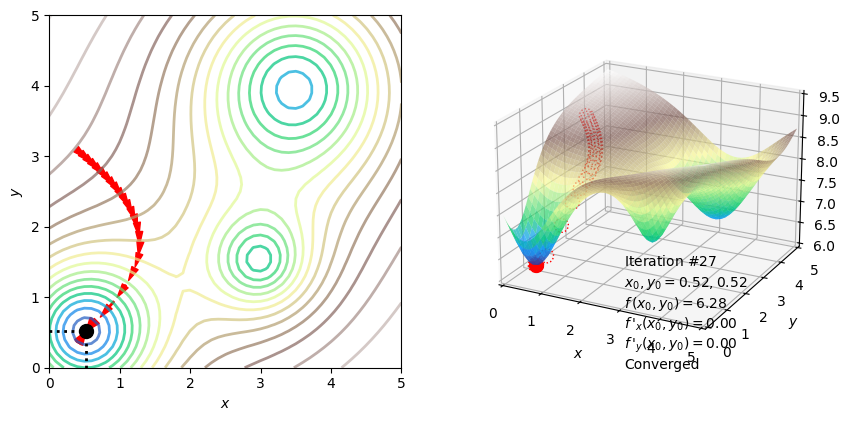

In [27]:
# Converges to the global minimum point.
num_iterations = 30; learning_rate = 0.2; x_initial = 0.5; y_initial = 3
# Converges to a local minimum point.
# num_iterations = 20; learning_rate = 0.2; x_initial = 2; y_initial = 3
# Converges to another local minimum point.
# num_iterations = 20; learning_rate = 0.2; x_initial = 4; y_initial = 0.5

gd_example_4 = gradient_descent_two_variables([0, 5], [0, 5], [6, 9.5],
                                              f_example_4, dfdx_example_4, dfdy_example_4,
                                              gradient_descent, num_iterations, learning_rate,
                                              x_initial, y_initial,
                                              [2, 2, 6], 0.5, [2, 1, 63],
                                              cmap='terrain', view={'azim':-63,'elev':21})